In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [2]:
# Importing the dataset
dataset = pd.read_csv('data.csv')

In [3]:
dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [5]:
dataset.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
dataset.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
X = dataset.iloc[:, [2, 13]].values

In [9]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

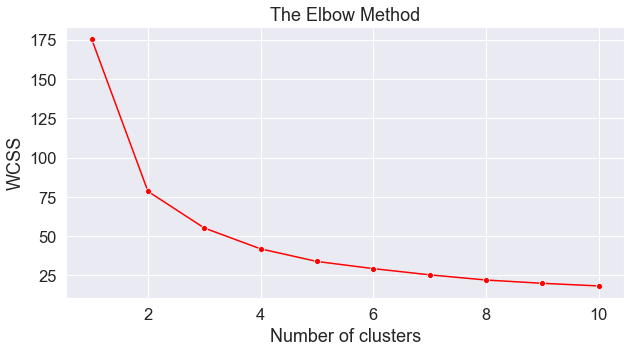

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

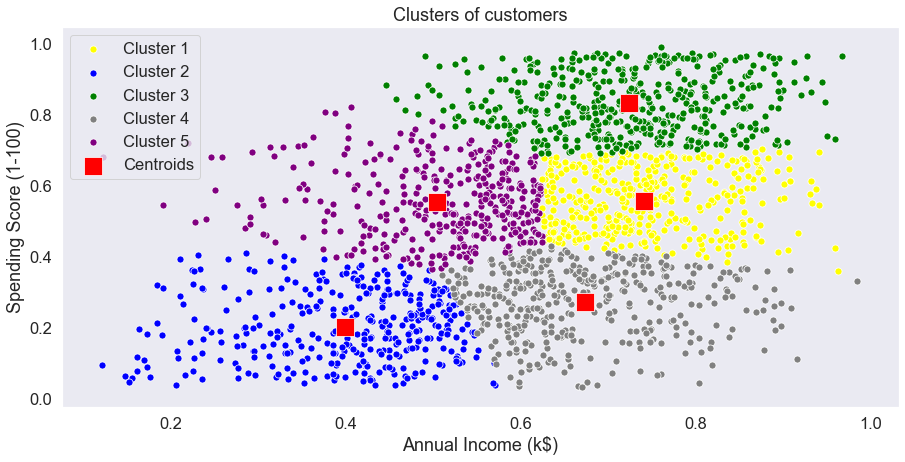

In [21]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'purple', label = 'Cluster 5',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
dataset["cluster"]=y_kmeans

In [22]:
dataset[dataset.cluster==0].describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,cluster
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.0
mean,947.007389,0.150708,0.742847,242105.125616,0.683096,0.106816,5.536946,0.167478,-6.723613,0.605911,0.111849,117.774936,3.990148,0.558887,0.586207,0.0
std,557.763942,0.198350,0.080054,74058.656397,0.165782,0.249733,3.702167,0.129823,2.651141,0.489257,0.097010,21.767327,0.121316,0.083355,0.493120,0.0
min,1.000000,0.000022,0.624000,47547.000000,0.120000,0.000000,0.000000,0.027100,-20.263000,0.000000,0.023200,64.992000,3.000000,0.361000,0.000000,0.0
25%,523.250000,0.015700,0.677250,199161.750000,0.573500,0.000000,1.250000,0.087200,-8.317500,0.000000,0.044825,99.935750,4.000000,0.485250,0.000000,0.0
50%,895.000000,0.067650,0.732000,227465.500000,0.687000,0.000022,6.000000,0.117500,-6.291000,1.000000,0.069200,119.998500,4.000000,0.562000,1.000000,0.0
75%,1410.500000,0.209000,0.801000,267066.000000,0.811500,0.017950,9.000000,0.202750,-4.923250,1.000000,0.145250,130.020250,4.000000,0.633750,1.000000,0.0
max,2014.000000,0.971000,0.962000,745653.000000,0.989000,0.931000,11.000000,0.963000,-0.718000,1.000000,0.548000,191.404000,5.000000,0.704000,1.000000,0.0


In [15]:
dataset[dataset.cluster==2].describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,cluster
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.0
mean,948.024017,0.173127,0.723098,245010.200873,0.734561,0.088769,5.406114,0.174802,-6.679976,0.604803,0.089901,119.054572,4.002183,0.832784,0.567686,2.0
std,616.203941,0.199769,0.102187,82935.605749,0.155218,0.213622,3.604781,0.149683,2.837696,0.489427,0.086973,23.850996,0.123744,0.079921,0.495939,0.0
min,4.000000,0.000041,0.446000,51547.000000,0.161000,0.000000,0.000000,0.018800,-19.846000,0.000000,0.023100,69.009000,3.000000,0.691000,0.000000,2.0
25%,405.250000,0.022250,0.653250,195673.000000,0.640250,0.000000,2.000000,0.080250,-8.374250,0.000000,0.039325,100.878250,4.000000,0.769000,0.000000,2.0
50%,901.500000,0.099300,0.725000,226928.500000,0.769000,0.000043,6.000000,0.118500,-6.209500,1.000000,0.058150,118.312500,4.000000,0.824000,1.000000,2.0
75%,1484.750000,0.256000,0.797750,269854.500000,0.858750,0.016325,9.000000,0.220000,-4.668000,1.000000,0.101750,130.031750,4.000000,0.895000,1.000000,2.0
max,2013.000000,0.847000,0.967000,703107.000000,0.989000,0.957000,11.000000,0.924000,-0.307000,1.000000,0.816000,199.727000,5.000000,0.992000,1.000000,2.0


In [16]:
dataset[dataset.cluster==3].describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,cluster
count,417.00000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0
mean,938.52518,0.155726,0.673312,253368.386091,0.653862,0.141826,5.103118,0.183043,-7.019801,0.599520,0.096763,121.682525,3.973621,0.272871,0.565947,3.0
std,593.65958,0.230564,0.093970,76593.033211,0.188332,0.279890,3.582330,0.140247,2.710380,0.490584,0.094850,22.836866,0.200419,0.092858,0.496227,0.0
min,0.00000,0.000018,0.510000,52006.000000,0.056500,0.000000,0.000000,0.026000,-20.815000,0.000000,0.023100,65.230000,3.000000,0.034800,0.000000,3.0
25%,415.00000,0.007320,0.599000,206148.000000,0.526000,0.000000,2.000000,0.092400,-8.341000,0.000000,0.036900,106.002000,4.000000,0.204000,0.000000,3.0
50%,840.00000,0.045300,0.654000,235947.000000,0.658000,0.000131,6.000000,0.122000,-6.621000,1.000000,0.054800,123.985000,4.000000,0.289000,1.000000,3.0
75%,1455.00000,0.224000,0.739000,280615.000000,0.796000,0.078500,8.000000,0.234000,-5.169000,1.000000,0.115000,130.073000,4.000000,0.350000,1.000000,3.0
max,2012.00000,0.978000,0.984000,849960.000000,0.986000,0.958000,11.000000,0.969000,-1.501000,1.000000,0.474000,195.978000,5.000000,0.431000,1.000000,3.0


In [17]:
dataset[dataset.cluster==4].describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,cluster
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.0
mean,1083.991957,0.137409,0.506247,223420.182306,0.752223,0.087129,5.576408,0.222301,-6.055265,0.592493,0.094001,127.946724,3.983914,0.553912,0.428954,4.0
std,587.465371,0.207733,0.090468,65645.787808,0.166743,0.227987,3.757098,0.171499,2.713258,0.492031,0.099447,33.055445,0.283524,0.099866,0.495592,0.0
min,10.000000,0.000003,0.123000,16042.000000,0.029100,0.000000,0.000000,0.039400,-23.363000,0.000000,0.026100,71.607000,3.000000,0.367000,0.000000,4.0
25%,558.000000,0.006920,0.462000,194240.000000,0.672000,0.000000,2.000000,0.102000,-7.372000,0.000000,0.035700,100.071000,4.000000,0.472000,0.000000,4.0
50%,1060.000000,0.036200,0.529000,215518.000000,0.790000,0.000003,6.000000,0.150000,-5.534000,1.000000,0.050500,126.394000,4.000000,0.545000,0.000000,4.0
75%,1648.000000,0.186000,0.576000,245293.000000,0.872000,0.007040,9.000000,0.313000,-4.261000,1.000000,0.104000,153.901000,4.000000,0.628000,1.000000,4.0
max,2016.000000,0.970000,0.624000,825027.000000,0.992000,0.968000,11.000000,0.897000,-0.787000,1.000000,0.622000,219.331000,5.000000,0.822000,1.000000,4.0
